# DATA MINING PROJECT: Analysis of a Supermarket’s Customers
## 1.1) Data Understanding: Distribution, Statistics & Correlation
### *Antonio Strippoli, Valerio Mariani*

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sn
from math import ceil
from natsort import natsorted
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [2]:
def plot(ax, folder="df_plots", filename="", figsize=(6.4, 4.8)):
    fig = plt.gcf()
    fig.set_size_inches(*figsize)
    plt.tight_layout()
    if filename:
        path = os.path.join("..", "report", "imgs", folder)
        if not os.path.exists(path):
            os.mkdir(path)
        plt.savefig(os.path.join(path, filename))
    plt.show()
    plt.close()

def plt_radar(df: pd.DataFrame, colors=[], folder="df_plots", filename=""):
    """Represent a DataFrame using a radar plot.
    """
    # Number of variable
    categories=list(df.index)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    ylim = ceil(df.max().max())
    ticks = list(range(0,ylim,5))
    ticks_str = list(map(lambda x: str(x), ticks))
    plt.yticks(ticks, ticks_str, color="grey", size=7)
    plt.ylim(0,ylim)

    # PART 2: Add plots
    for i, c in enumerate(df.columns):
        # Ind1
        values = list(df[c])
        values += values[:1]
        ax.plot(angles, values, color=colors[i], linewidth=1, linestyle='solid', label=c)
        ax.fill(angles, values, color=colors[i], alpha=0.1)
    
    # Add legend and plot
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plot(None, folder=folder, filename=filename)

In [3]:
# Load the secondary data from the given file
df = pd.read_csv('customer_supermarket_2.csv', index_col=0, parse_dates=["PurchaseDate"])

In [ ]:
# Prints data's samples and informations,
# including the number of not null values for each columns
df.info()
print("")
df.head()

In [ ]:
# Sale statistics
print("SALE DESCRIBE:\n", df["Sale"].describe())

# Sale distribution
df_products_catalog = df[["ProdID", "Sale"]].drop_duplicates()["Sale"]
print("PRODUCTS CATALOG DESCRIBE:\n", df_products_catalog.describe())

plot(sn.distplot(df_products_catalog[df_products_catalog < 100], bins=50), filename="Sale_HIST")
plot(df_products_catalog.plot.box(), filename="Sale_BP", figsize=(2, 4.8))

In [ ]:
# Distribution of buys and returns
print("RATIO QTA POSITIVE/NEGATIVE:\n", (df["Qta"] > 0).value_counts())
print("STATISTICS QTA > 0:\n", df[df["Qta"] > 0]["Qta"].describe())
print("STATISTICS QTA < 0:\n", df[df["Qta"] < 0]["Qta"].describe())

plot(
    df[abs(df['Qta']) < 75].plot.scatter('Qta', 'Sale', c='Sale', colormap='winter', colorbar=False, figsize=(10,7)),
    filename="Sale_Qta"
)

In [ ]:
# === Monthly statistics ===
def year_month(i):
    x = df.loc[i]['PurchaseDate']
    return f"{x.year}/{x.month}"

# Number of baskets and profit per month
tmp = df[["PurchaseDate", "Sale", "Qta"]]
tmp["Profit"] = tmp["Sale"] * tmp["Qta"]
tmp.drop(["Sale", "Qta"], axis=1, inplace=True)
monthly_stats = tmp.groupby(year_month).agg('sum')

monthly_stats["Baskets"] = df[["PurchaseDate", "BasketID"]].drop_duplicates().groupby(year_month).size()
monthly_stats = monthly_stats.reindex(index=natsorted(monthly_stats.index))

print("MONTHLY STATS:\n", monthly_stats)
print("CORRELAZIONE:")
print(monthly_stats.corr())

monthly_stats['Baskets'] = monthly_stats['Baskets'] / sum(monthly_stats['Baskets']) * 100
monthly_stats['Profit'] = monthly_stats['Profit'] / sum(monthly_stats['Profit']) * 100

plot(monthly_stats.plot.bar(), filename="Monthly_Baskets_Profit", figsize=(14,7))

COUNTRY STATS:
                             Profit  Baskets
CustomerCountry                            
Australia             1.373119e+05       65
Austria               1.017448e+04       18
Bahrain               5.484000e+02        2
Belgium               4.098971e+04      114
Brazil                1.143600e+03        1
Canada                3.666380e+03        6
Channel Islands       2.009054e+04       32
Cyprus                1.307334e+04       18
Czech Republic        7.652300e+02        4
Denmark               1.879989e+04       21
EIRE                  2.506286e+05      313
European Community    1.291750e+03        5
Finland               2.232882e+04       47
France                1.972386e+05      444
Germany               2.230960e+05      576
Greece                4.710520e+03        6
Iceland               4.310000e+03        7
Israel                7.221690e+03        5
Italy                 1.702961e+04       52
Japan                 3.554257e+04       27
Lebanon         

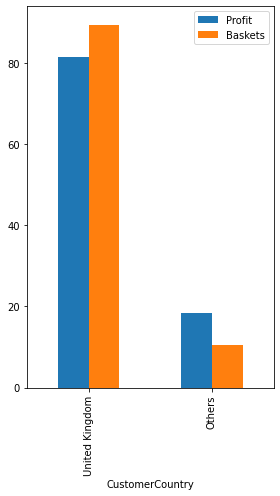

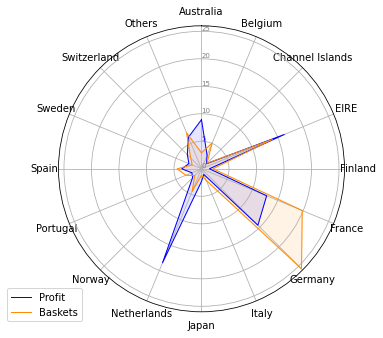

,Profit,Baskets
CustomerCountry,,
Australia,8.929842,2.903082
Belgium,2.665695,5.091559
Channel Islands,1.306553,1.429209
EIRE,16.299199,13.979455
Finland,1.452116,2.099151
France,12.827067,19.830281
Germany,14.508663,25.725770
Italy,1.107491,2.322465
Japan,2.311449,1.205895


In [5]:
# Number of baskets and profit per country
tmp = df[["CustomerCountry", "Sale", "Qta"]]
tmp["Profit"] = tmp["Sale"] * tmp["Qta"]
tmp.drop(["Qta", "Sale"], axis=1, inplace=True)
country_stats = tmp.groupby("CustomerCountry").agg('sum')

country_stats["Baskets"] = df[['CustomerCountry', 'BasketID']].groupby('CustomerCountry').agg(lambda x: x.nunique())['BasketID']

print("COUNTRY STATS:\n", country_stats)
print("CORRELAZIONE:")
print(country_stats.corr())

# First plot: UK vs Other countries
tmp = country_stats[country_stats.index != 'United Kingdom'].agg('sum')
country_stats1 = country_stats[country_stats.index == 'United Kingdom']
country_stats1.loc["Others"] = tmp.values
# Normalize values
country_stats1['Baskets'] = country_stats1['Baskets'] / sum(country_stats1['Baskets']) * 100
country_stats1['Profit'] = country_stats1['Profit'] / sum(country_stats1['Profit']) * 100
# Plot
plot(country_stats1.plot.bar(), filename="Country_Baskets_Profit", figsize=(4,7))

# Second plot: Other countries
country_stats2 = country_stats.drop('United Kingdom')
# Aggregate small values
threshold = 25
tmp = country_stats2[country_stats2["Baskets"] < threshold].agg('sum')
country_stats2 = country_stats2[country_stats2["Baskets"] >= threshold]
country_stats2.loc["Others"] = tmp.values
# Normalize values
country_stats2['Baskets'] = country_stats2['Baskets'] / sum(country_stats2['Baskets']) * 100
country_stats2['Profit'] = country_stats2['Profit'] / sum(country_stats2['Profit']) * 100

# Plot
plt_radar(country_stats2, colors=['b', 'darkorange'], filename="Country_Basket_Profit_No_UK")

In [ ]:
# Monthly activity per country
ma_country = df.groupby(['CustomerCountry', year_month]).apply(lambda x: sum(x["Qta"] * x["Sale"]))
ma_country = ma_country.unstack(level=0)

ma_country = ma_country.reindex(index=natsorted(ma_country.index))
cols = list(ma_country.columns)
cols.sort(key=lambda x: ma_country[x].notnull().sum())
ma_country = ma_country[cols]
for i, c in enumerate(ma_country.columns):
    ma_country[c][ma_country[c].notnull()] = i

ax = ma_country.plot.line(legend=False, style='-o')
ax.set_xticks(range(0, len(ma_country.index)))
ax.set_xticklabels([x.replace('/', '\n') for x in ma_country.index])
ax.set_yticks(range(0, len(ma_country.columns)))
ax.set_yticklabels(list(ma_country.columns))
plot(ax, filename="Monthly_Activity_Country", figsize=(16,8))

In [ ]:
print("UNIQUE PRODUCTS:", len(df['ProdID'].unique()))

# Most popular products
popular_prods = df[df['Qta']>0][['ProdDescr', 'Qta']].groupby('ProdDescr').agg('sum').sort_values(by='Qta', ascending=False).head(10)
plot(popular_prods.plot.barh(color='darkgreen'), filename="Popular_Purchased", figsize=(10,3))

# Most returned products
popular_prods = df[df['Qta']<0][['ProdDescr', 'Qta']].groupby('ProdDescr').agg('sum').sort_values(by='Qta', ascending=True).head(10)
plot(popular_prods.plot.barh(color='darkred'), filename="Popular_Returns", figsize=(10,3))